<a href="https://colab.research.google.com/github/dkomlen/finance-ml/blob/main/Chapter%208%20-%20Clustering%20individuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 2.1 Loading the python packages

In [5]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

#Import Model Packages 
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

#### 2.2. Loading the Data

In [6]:
dataset = pd.read_excel('https://github.com/tatsath/fin-ml/raw/master/Chapter%208%20-%20Unsup.%20Learning%20-%20Clustering/Case%20Study2%20-%20Portfolio%20Management%20-%20%20Clustering%20Investors/ProcessedData.xlsx')

In [7]:
dataset.head()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


### 3. Exploratory Data Analysis

#### 3.1. Descriptive Statistics

In [8]:
dataset.shape

(3866, 13)

In [9]:
# describe data
pd.set_option('precision', 3)
dataset.describe()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
count,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000
mean,1933.500,3.107,2.906,1.353,0.938,3.697,1.742,3.043,0.717,2.446,3.561,2.976,3.671
std,1116.162,1.513,1.066,0.478,1.249,1.618,0.934,0.879,0.451,0.743,1.304,1.463,1.184
min,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,967.250,2.000,2.000,1.000,0.000,3.000,1.000,2.000,0.000,2.000,2.000,2.000,3.000
50%,1933.500,3.000,3.000,1.000,0.000,3.000,1.000,3.000,1.000,3.000,4.000,3.000,4.000
75%,2899.750,4.000,4.000,2.000,2.000,5.000,3.000,4.000,1.000,3.000,5.000,4.000,5.000
max,3866.000,6.000,4.000,2.000,8.000,6.000,4.000,4.000,1.000,3.000,5.000,5.000,5.000


#### 3.2. Data Visualization

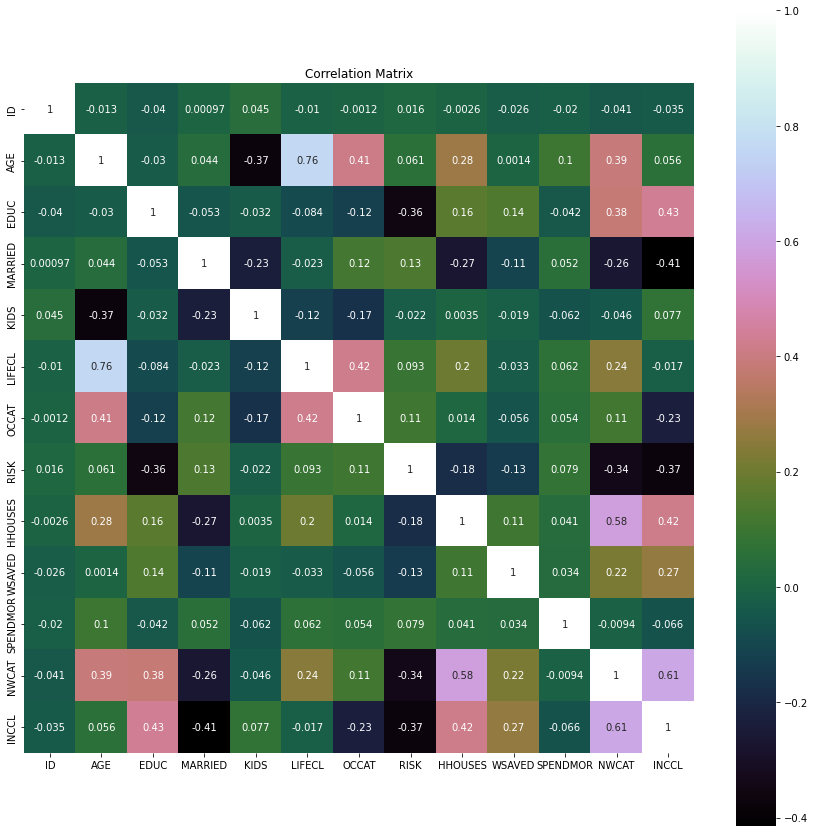

In [10]:
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, annot=True, square=True, cmap='cubehelix');

### 4. Data Preparation

#### 4.1. Data Cleaning

In [11]:
dataset.isnull().sum()

ID          0
AGE         0
EDUC        0
MARRIED     0
KIDS        0
LIFECL      0
OCCAT       0
RISK        0
HHOUSES     0
WSAVED      0
SPENDMOR    0
NWCAT       0
INCCL       0
dtype: int64

In [12]:
X = dataset.copy('deep')
X = X.drop(['ID'], axis=1)
X.head()

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,3,2,1,0,2,1,3,1,1,5,3,4
1,4,4,1,2,5,2,3,0,2,5,5,5
2,3,1,1,2,3,2,2,1,2,4,4,4
3,3,1,1,2,3,2,2,1,2,4,3,4
4,4,3,1,1,5,1,2,1,3,3,5,5


### 5. Evaluate Algoritms and Models

1.   K-means
2.   Affinitiy Propagation

#### 5.1. K-Means Clustering

##### 5.1.1. Finding Optimal number of clusters

1. Sum of square errors (SSE) within clusters
2. Silhouette score


In [13]:
distortions = []
max_loop = 40
for k in range (2, max_loop):
  print('Testing k = ', k)
  k_means = KMeans(n_clusters = k)
  k_means.fit(X)
  distortions.append(k_means.inertia_)

Testing k =  2
Testing k =  3
Testing k =  4
Testing k =  5
Testing k =  6
Testing k =  7
Testing k =  8
Testing k =  9
Testing k =  10
Testing k =  11
Testing k =  12
Testing k =  13
Testing k =  14
Testing k =  15
Testing k =  16
Testing k =  17
Testing k =  18
Testing k =  19
Testing k =  20
Testing k =  21
Testing k =  22
Testing k =  23
Testing k =  24
Testing k =  25
Testing k =  26
Testing k =  27
Testing k =  28
Testing k =  29
Testing k =  30
Testing k =  31
Testing k =  32
Testing k =  33
Testing k =  34
Testing k =  35
Testing k =  36
Testing k =  37
Testing k =  38
Testing k =  39


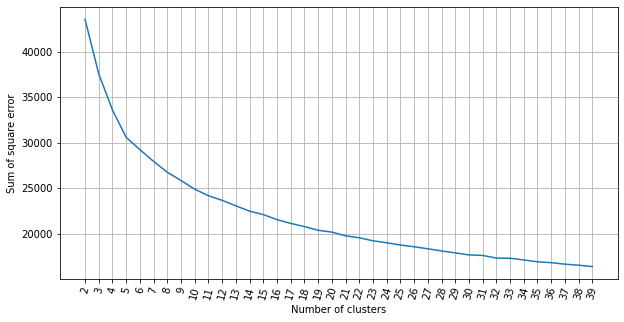

In [15]:
fig = plt.figure(figsize=(10,5))
plt.plot(range(2,max_loop), distortions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of square error')
plt.grid(True)

#### Silhouette score

In [23]:
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
  print('Testing k = ', k)
  kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
  kmeans.fit(X)
  silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))

Testing  2
Testing  3
Testing  4
Testing  5
Testing  6
Testing  7
Testing  8
Testing  9
Testing  10
Testing  11
Testing  12
Testing  13
Testing  14
Testing  15
Testing  16
Testing  17
Testing  18
Testing  19
Testing  20
Testing  21
Testing  22
Testing  23
Testing  24
Testing  25
Testing  26
Testing  27
Testing  28
Testing  29
Testing  30
Testing  31
Testing  32
Testing  33
Testing  34
Testing  35
Testing  36
Testing  37
Testing  38
Testing  39


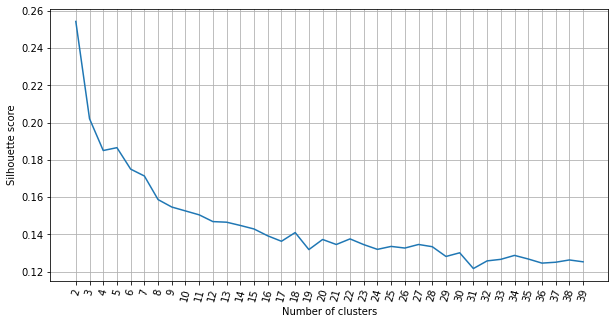

In [24]:
fig = plt.figure(figsize=(10,5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)